# Overview

### Dataset link:
https://drive.google.com/file/d/1m53GMGvefv99ZeTOuhjb5wLkTSwfMTCf/view?usp=sharing

### Dataset description:
Thyroid Disease Data Set - http://archive.ics.uci.edu/ml/datasets/thyroid+disease

#### Target variable:
"Class"




---

# General Description of Thyroid Disease Databases and Related Files

This directory contains 6 databases, corresponding test set, and corresponding documentation.  They were left at the University of California at Irvine by Ross Quinlan during his visit in 1987 for the 1987 Machine Learning Workshop.  <br>


The documentation files (with file extension "names") are formatted to be read by Quinlan's C4 decision tree program.  Though briefer than the other documentation files found in this database repository, they should suffice to describe the database, specifically:

    1. Source
    2. Number and names of attributes (including class names)
    3. Types of values that each attribute takes

In general, these databases are quite similar and can be characterized somewhat as follows:

    1. Many attributes (29 or so, mostly the same set over all the databases)
    2. mostly numeric or Boolean valued attributes
    3. thyroid disease domains (records provided by the Garavan Institute of Sydney, Australia)
    4. several missing attribute values (signified by "?")
    5. small number of classes (under 10, changes with each database)
    7. 2800 instances in each data set
    8. 972 instances in each test set (It seems that the test sets' instances are disjoint with respect to the 
        corresponding data sets, but this has not been verified)
<br>

See the following for a discussion of relevant experiments and related work:<br>
 - Quinlan,J.R., Compton,P.J., Horn,K.A., & Lazurus,L. (1986).
    Inductive knowledge acquisition: A case study.
    In Proceedings of the Second Australian Conference on Applications of Expert Systems. Sydney, Australia.

- Quinlan,J.R. (1986). Induction of decision trees. Machine Learning, 1, 81--106.<br>

Note that the instances in these databases are followed by a vertical bar and a number.  These appear to be a patient id number.  The vertical bar is interepreted by Quinlan's algorithms as "ignore the remainder of this line". <br>

=========================================================================================================================
This database now also contains an additional two data files, named hypothyroid.data and sick-euthyroid.data. They have approximately the same data format and set of attributes as the other 6 databases, but their integrity is questionable.  Ross Quinlan is concerned that they may have been corrupted since they first arrived at UCI, but we have not yet established the validity of this possibility. These 2 databases differ in terms of their number of instances (3163) and lack of corresponding  test files.  They each have 2 concepts (negative/hypothyroid and  sick-euthyroid/negative respectively). Their source also appears to be the Garavan institute. Each contains several missing values.<br>

Another relatively recent file thyroid0387.data has been added that contains the latest version of an archive of thyroid diagnoses obtained from the Garvan Institute, consisting of 9172 records from 1984 to early 1987.<br>

A domain theory related to thyroid desease has also been added recently (thyroid.theory).<br>

The files new-thyroid.[names,data] were donated by Stefan Aberhard.

In [ ]:
#import library

import pandas as pd
import numpy as np
import collections

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE


%matplotlib inline
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import files
uploaded = files.upload()

# File CSV for sharing & download to upload: https://drive.google.com/file/d/1UDq_1aVRnQJF0rm6H2oDVibJZ_huluS6/view?usp=sharing

Saving dataset_57_hypothyroid.csv to dataset_57_hypothyroid (4).csv


In [ ]:
#Loading dataset from csv
# df = pd.read_csv("dataset_57_hypothyroid.csv")

import io
df = pd.read_csv(io.BytesIO(uploaded["dataset_57_hypothyroid.csv"]))

#check the first 5 rows
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [ ]:
#check the last 5 rows
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.2,t,99,t,1.07,t,92,f,?,other,negative


In [ ]:
#check the shape of the dataset - total number of rows and columns
df.shape

(3772, 30)

In [ ]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
#check the sum of any missing values
df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [ ]:
# Take a view on the expected output - Class
df.value_counts("Class")

Class
negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
dtype: int64

In [ ]:
# Have a quick view to see any anomolies value in the data frame

for col in df:
    unique = df[col].unique()
    print('List of unique value in column',col,':','\n',unique,'\n')

List of unique value in column age : 
 ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92'] 

List of unique value in column sex : 
 ['F' 'M' '?'] 

List of unique value in column on_thyroxine : 
 ['f' 't'] 

List of unique value in column query_on_thyroxine : 
 ['f' 't'] 

List of unique value in column on_antithyroid_medication : 
 ['f' 't'] 

List of unique value in column sick : 
 ['f' 't'] 

List of unique value in column pregnant : 
 ['f' 't'] 

List of unique value in column thyroid_surgery : 
 ['f' 't'] 

List of unique value in column I131_treatment : 
 ['f' 't'] 

L

In [ ]:
#check if any duplicate values/rows
df.duplicated().sum()

61

In [ ]:
# Pulling the original and duplicated rows to do a quick view, making sure they are indeed exact duplicated data


# pd.set_option('display.max_rows', None)

df.loc[df.duplicated(keep = False)]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
39,64,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
92,26,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
104,57,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
204,26,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
210,64,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,29,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3638,38,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3707,51,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3752,71,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative


These duplicates may or may not be the same individuals which happened to have the same/similar records. Since they not really adding much values and may reduced the accuracy of the model, given the numbers of duplicated is below 100, I believed it is wise to drop these rows.

In [ ]:
# dropping those duplicated rows and only keep the first records.
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
#To see the new shape of the dataset after primary clean up
df.shape

# From 3772 rows dropped to 3711 rows only

(3711, 30)

While there were no missing value found using .isna(), but we can see some value showing as **'?'** as missing values. So calling them out below and sum the total counts to see the total numbers of ? value.

In [ ]:
df[df=='?'].count()

age                             1
sex                           149
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           309
T3_measured                     0
T3                            709
TT4_measured                    0
TT4                           171
T4U_measured                    0
T4U                           327
FTI_measured                    0
FTI                           325
TBG_measured                    0
TBG                          3711
referral_source                 0
Class         

From the above listing, there are quite some amount of missing data which marked as "?". Where's the breakdown of my decision on how to handle these columns with missing data <br>

    Column name   | Numbers of missing Data
    age            : 1    --> Since it's only 1 missing data, will remove the entire row associated
    sex            : 149  --> Since the Targeted output is to identify the classes, there is no use of keeping these rows
    TSH            : 309  --> We have the measured column data, this column do not benefit our objective, delete column
    T3             : 709  --> We have the measured column data, this column do not benefit our objective, delete column
    TT4            : 171  --> We have the measured column data, this column do not benefit our objective, delete column
    T4U            : 327  --> We have the measured column data, this column do not benefit our objective, delete column
    FTI            : 325  --> We have the measured column data, this column do not benefit our objective, delete column
    TBG_measured   : 0    --> TBG entire column is missing data, even this has no missing data but only 1 value, no benefit
    TBG            : 3711 --> This entire column is missing data so no reason to keep





In [ ]:
# df[df["age"]=="?"] 
#row number 1985

#Dropping the 1 row that has missing value with '?'
df.drop([1985], axis=0, inplace=True)

In [ ]:
#reinspect the column after dropped the 1 row with ? value
df[df["age"]=="?"] 

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class


In [ ]:
# drop the columns

df.drop(columns=["sex","TSH","T3","TT4","T4U","FTI","TBG_measured","TBG"], inplace=True)

df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source,Class
0,41,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVHC,negative
1,23,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
2,46,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,other,negative
3,70,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
4,70,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative


In [ ]:
#convert type after cleaned up '?'

df[["age"]] = df[["age"]] .astype(int)
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source,Class
0,41,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVHC,negative
1,23,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
2,46,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,other,negative
3,70,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
4,70,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative


In [ ]:
#review the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3710 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3710 non-null   int64 
 1   on_thyroxine               3710 non-null   object
 2   query_on_thyroxine         3710 non-null   object
 3   on_antithyroid_medication  3710 non-null   object
 4   sick                       3710 non-null   object
 5   pregnant                   3710 non-null   object
 6   thyroid_surgery            3710 non-null   object
 7   I131_treatment             3710 non-null   object
 8   query_hypothyroid          3710 non-null   object
 9   query_hyperthyroid         3710 non-null   object
 10  lithium                    3710 non-null   object
 11  goitre                     3710 non-null   object
 12  tumor                      3710 non-null   object
 13  hypopituitary              3710 non-null   object
 14  psych   

In [ ]:
df.shape

(3710, 22)

In [ ]:
#To view the max, min under age column
df.describe()

,age
count,3710.000000
mean,51.860377
std,20.123585
min,1.000000
25%,36.000000
50%,54.000000
75%,67.000000
max,455.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


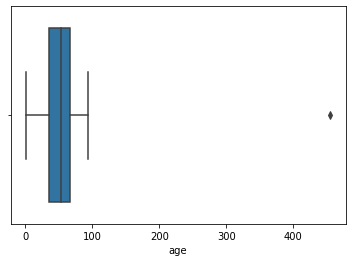

In [ ]:
#From the describe output, we can see the max value is 455 which is odd for a human age. Using Scatterplot to check if this outliner is valid

sns.boxplot(df["age"])

From this boxplot we can see there is an extreme outlier beyong 400 years old which is very impossible at the current era

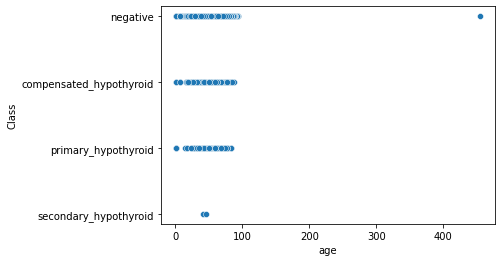

In [ ]:
sns.scatterplot(x="age", y="Class", data=df)

In [ ]:
#call out any rows that have age value more than 100 since 100 years old is still highly possible for average of age.
df[df["age"]> 100]

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source,Class
1364,455,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative


In [ ]:
#identified the specific row that is outlier and since it is only 1 row, so removed the entire row from will be most ideal.
df.drop([1364], axis=0, inplace=True)

In [ ]:
df.shape

(3709, 22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


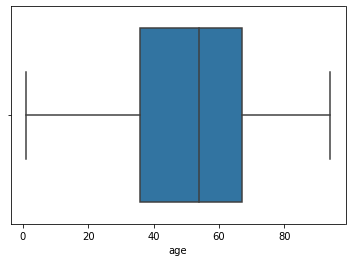

In [ ]:
sns.boxplot(df["age"])

Review the age column using boxplot, we can now see there is no more extreme outlier and the average of age group for this dataset is between 30+ to 60+ years old.

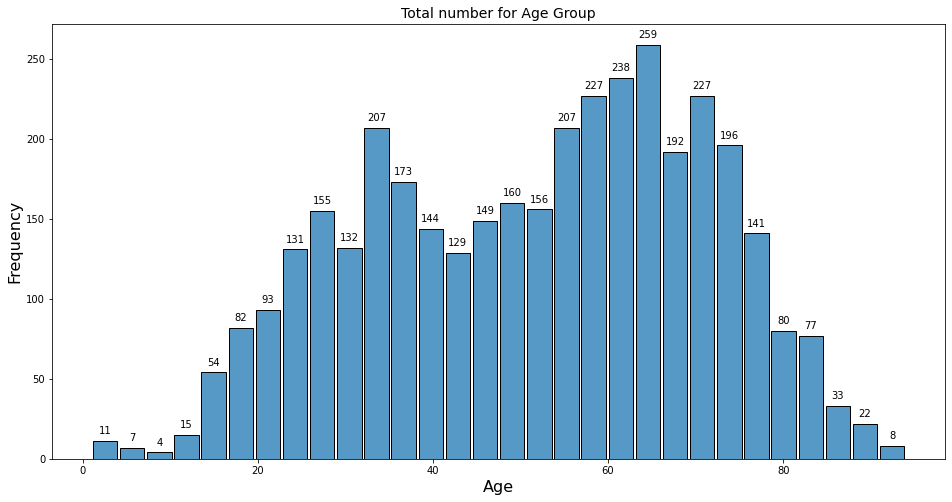

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = sns.histplot(x="age", data=df, shrink=.9, bins=30)

for value in ax.patches:
    height = value.get_height()
    ax.annotate(f'{int(height)}', xy=(value.get_x()+value.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 


plt.xlabel("Age", size=16)
plt.ylabel("Frequency", size=16)
# plt.bar_label(ax.containers[0])

  
# title    
plt.title("Total number for Age Group", fontsize=14)
# # To hide the grid that was shown 
# ax.grid(False)

plt.show()

From the histogram above, we get to see the distribution across age of the individual who involved in this thyroid research. The majority of age is between 50+ to 70+ years old included in this dataset from different referral source as shown in the histogram for different source below. <br>

While the total counts of individual are high around this range, it doesn't means they are also the high number of age group that has Thyroid, they just happened to be the higher group that participated in this dataset reseach. We can see it from the histogram below, where most of the numbers are actually tested negative towards Thyroid Disease.

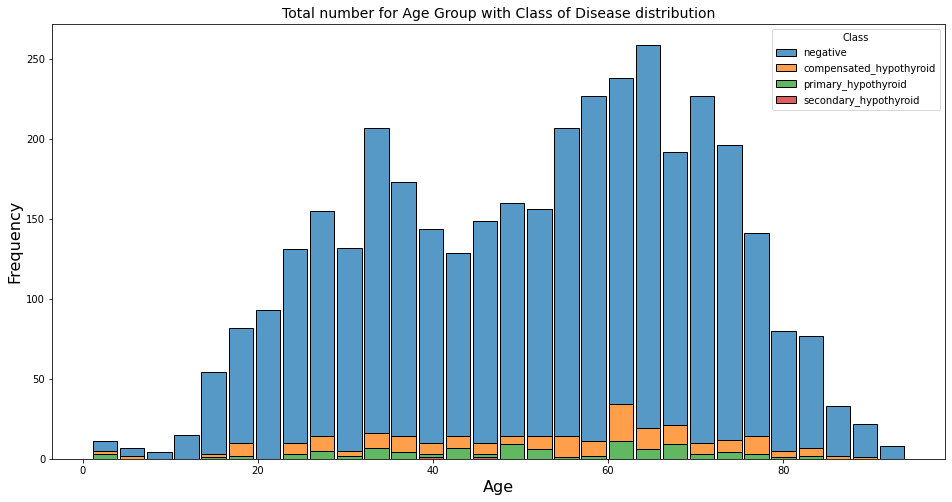

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = sns.histplot(x="age", hue="Class", multiple="stack", data=df, shrink=.9, bins=30)

plt.xlabel("Age", size=16)
plt.ylabel("Frequency", size=16)
# plt.bar_label(ax.containers[0])

  
# title    
plt.title("Total number for Age Group with Class of Disease distribution", fontsize=14)
# # To hide the grid that was shown 
# ax.grid(False)

plt.show()

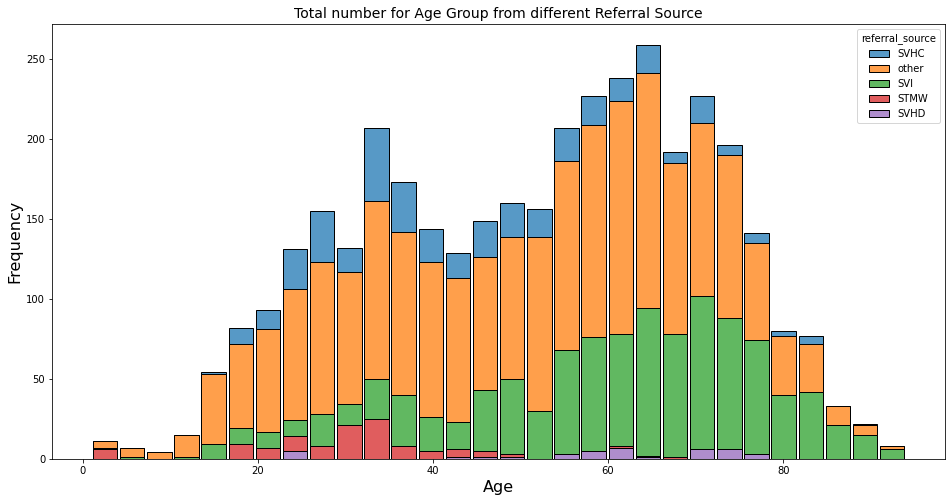

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = sns.histplot(x="age", hue="referral_source", multiple="stack", data=df, shrink=.9, bins=30)

plt.xlabel("Age", size=16)
plt.ylabel("Frequency", size=16)
# plt.bar_label(ax.containers[0])

  
# title    
plt.title("Total number for Age Group from different Referral Source", fontsize=14)
# # To hide the grid that was shown 
# ax.grid(False)

plt.show()

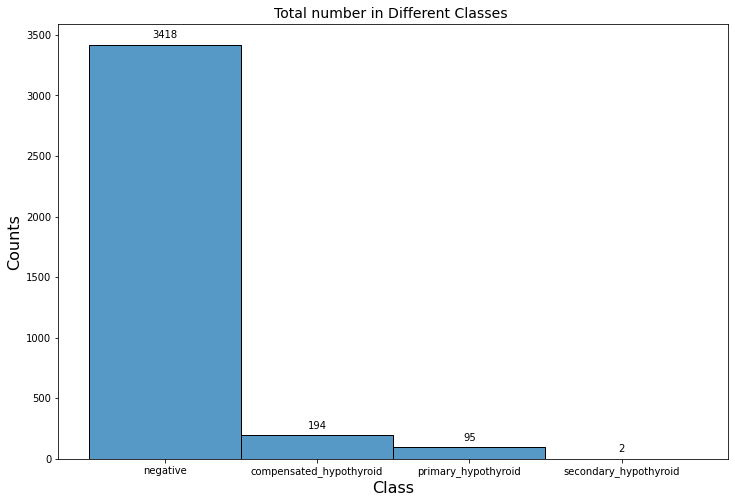

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = sns.histplot(x="Class", data=df)

for value in ax.patches:
    height = value.get_height()
    ax.annotate(f'{int(height)}', xy=(value.get_x()+value.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 


plt.xlabel("Class", size=16)
plt.ylabel("Counts", size=16)
# plt.bar_label(ax.containers[0])

  
# title    
plt.title("Total number in Different Classes ", fontsize=14)
# # To hide the grid that was shown 
# ax.grid(False)

plt.show()

So this histogram plotting of the Class, we can see that Negative group class that is almost 92& of the entire dataset. So our dataset can be consider as **<ins>imbalanced classes</ins>** dataset. <br>

Since Hypothyroid only has 2 outcome for "secondary_hypothyroid" and they will not make big influnces or impact to the model prediction. 

In [ ]:
# df[df["Class"]=="secondary_hypothyroid"] 
#row number 1505 & 2735

#dropping the 2 rows that is secondary_hypothyroid class
df.drop([1505,2735], axis=0, inplace=True)

In [ ]:
#now the secondary_hypothyroid is gone from the Class group
df["Class"].value_counts()

negative                   3418
compensated_hypothyroid     194
primary_hypothyroid          95
Name: Class, dtype: int64

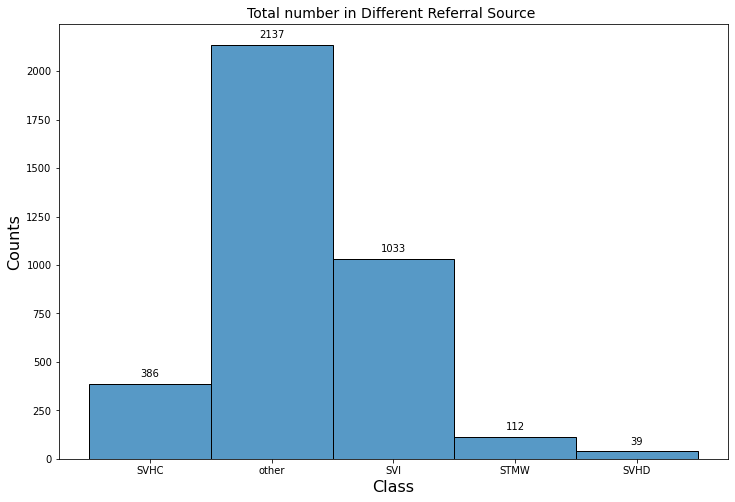

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = sns.histplot(x="referral_source", data=df)

for value in ax.patches:
    height = value.get_height()
    ax.annotate(f'{int(height)}', xy=(value.get_x()+value.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 


plt.xlabel("Class", size=16)
plt.ylabel("Counts", size=16)
# plt.bar_label(ax.containers[0])

  
# title    
plt.title("Total number in Different Referral Source ", fontsize=14)
# # To hide the grid that was shown 
# ax.grid(False)

plt.show()

There are total 5 different referral source but the group of **other** occupied largely in this dataset

In [ ]:
# df[df.columns].value_counts().index.tolist()


#Taking a glance view of total numbers of values in each columns except age column
for col in df.iloc[:,1:]:
    count = df[col].value_counts()
    print('List of unique value in column',col,':\n',count,'\n')

List of unique value in column on_thyroxine :
 f    3244
t     463
Name: on_thyroxine, dtype: int64 

List of unique value in column query_on_thyroxine :
 f    3657
t      50
Name: query_on_thyroxine, dtype: int64 

List of unique value in column on_antithyroid_medication :
 f    3665
t      42
Name: on_antithyroid_medication, dtype: int64 

List of unique value in column sick :
 f    3560
t     147
Name: sick, dtype: int64 

List of unique value in column pregnant :
 f    3654
t      53
Name: pregnant, dtype: int64 

List of unique value in column thyroid_surgery :
 f    3654
t      53
Name: thyroid_surgery, dtype: int64 

List of unique value in column I131_treatment :
 f    3649
t      58
Name: I131_treatment, dtype: int64 

List of unique value in column query_hypothyroid :
 f    3474
t     233
Name: query_hypothyroid, dtype: int64 

List of unique value in column query_hyperthyroid :
 f    3473
t     234
Name: query_hyperthyroid, dtype: int64 

List of unique value in column lithi

---

## Model Building

In [ ]:
#Making a copy to retain the original df in case need more EDA
df2 = df.copy()
df2.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source,Class
0,41,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVHC,negative
1,23,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
2,46,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,other,negative
3,70,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
4,70,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative


In [ ]:
df2.shape

(3707, 22)

## Categorical encoding

In [ ]:
le_ref = LabelEncoder()
le_ref.fit(df2['referral_source'])
list(le_ref.classes_)
df2['referral_source']=le_ref.transform(df2['referral_source'])

# Using the inverse_transform to check back which index key is which subscribed
list(le_ref.inverse_transform([0, 1, 2, 3, 4]))

['STMW', 'SVHC', 'SVHD', 'SVI', 'other']

In [ ]:
le_class = LabelEncoder()
le_class.fit(df2['Class'])
list(le_class.classes_)
df2['Class']=le_class.transform(df2['Class'])

# Using the inverse_transform to check back which index key is which subscribed
list(le_class.inverse_transform([0, 1, 2]))

['compensated_hypothyroid', 'negative', 'primary_hypothyroid']

In [ ]:
df2.replace(["f", "t"],[0,1], inplace=True)
df2.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,4,1
2,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,4,1
3,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,4,1
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,3,1


In [ ]:
df2.iloc[:,1:20].astype(int)

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
3769,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1
3770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3707 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3707 non-null   int64
 1   on_thyroxine               3707 non-null   int64
 2   query_on_thyroxine         3707 non-null   int64
 3   on_antithyroid_medication  3707 non-null   int64
 4   sick                       3707 non-null   int64
 5   pregnant                   3707 non-null   int64
 6   thyroid_surgery            3707 non-null   int64
 7   I131_treatment             3707 non-null   int64
 8   query_hypothyroid          3707 non-null   int64
 9   query_hyperthyroid         3707 non-null   int64
 10  lithium                    3707 non-null   int64
 11  goitre                     3707 non-null   int64
 12  tumor                      3707 non-null   int64
 13  hypopituitary              3707 non-null   int64
 14  psych                   

---

## Train & Test set split

In [ ]:
#splitting the data to X - observation groups and Y - targeted output
X = df2.drop(columns=["Class"])
y = df2["Class"]

In [ ]:
print(X.shape, y.shape)

(3707, 21) (3707,)


In [ ]:
#Splitting into train and test set with also using stratify making sure in y sets have even group of the Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=111, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2594, 21) (2594,)
(1113, 21) (1113,)


In [ ]:
X_train.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source
2063,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4
1322,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
3250,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4
2344,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,3
195,45,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,4


In [ ]:
y_train.value_counts()

1    2392
0     136
2      66
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

1    1026
0      58
2      29
Name: Class, dtype: int64

### Data Normalization

In [ ]:
#Normalization is use after train_test_split in order to prevent data leakage

# Normalize the data between 0 to 1
scaler = MinMaxScaler()

# For X
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

---

# Algorithms - Logistic Regression & K-Nearest Neighbours

For the Model Building using Logistic Regression with and without Regularization and K-Nearest Neighbors below, the flow is the same as following: <br>

1. Setup the classifier
2. Preliminary quick evaluation using metrics with averaged Micro & Macro
3. As the dataset is **<ins>Imbalanced Classes</ins>** dataset, using the following method to train the dataset to see if prediction improved
    - Resampling Techniques — Oversample minority class
    - SMOTE (a.k.a Synthetic Minority Oversampling Technique)
4. Inspect the algorithms with Confusion Matrix to see each of their performance
5. Further evaluate the models with Cross Validation to see the performance if is better or worsen.
6. Next inspect the dataset with the algorithms with Hyperparameter Tuning
7. Then look into the Features Importance

## Logistic Regression w\wo regularization

In [ ]:
#setting up the Logistic Regression classifier
logR = LogisticRegression(solver='lbfgs', max_iter=5000, multi_class="ovr") #ovr = One-vs-Rest

logR_model = logR.fit(X_train_norm, y_train)
logR_predict = logR_model.predict(X_test_norm)

In [ ]:
logR_accuracy_score = logR.score(X_test_norm, y_test)
print("Accuracy Score for Test dataset= {:.2f}%".format(logR_accuracy_score*100))

Accuracy Score for Test dataset= 92.18%


Here we got the accuracy score as high as 92%, however keeping in mind that Accuracy is only taking into account of True Positive and True Negative. Since we know this dataset is an imbalanced class/dataset, this could means the accuracy of the model prediction is leaning towards the "Negative Class" as the majority class.
<br>
<br>
Negative class/(total number of Class) = 3148/(3148+194+95+2) = approx 0.92
<br>
<br>
There we can see the accuracy is similar to the ratio of Negative class out of all values under "Class" column.
<br>
<br>
Let's use other evaluation metrics to further assess the performance of Logistic Regression

#### Micro & Macro avaraged evaluation metrics

Micro: Each <ins>instances</ins> has equal weights, so larger classes will have more influnce
<br>
Macro: Each <ins>class</ins> has equal weights
<br>
Weighted: In case of class imbalances (different number of instances related to different class labels).

In [ ]:
print("Micro-averaged Precision = {:.2f}% ".format(precision_score(y_test, logR_predict, average="micro")*100))
print("Macro-averaged Precision = {:.2f}% ".format(precision_score(y_test, logR_predict, average="macro")*100))
print("Weighted Macro-averaged Precision = {:.2f}% ".format(precision_score(y_test, logR_predict, average="weighted")*100))

Micro-averaged Precision = 92.18% 
Macro-averaged Precision = 30.73% 
Weighted Macro-averaged Precision = 84.98% 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Micro-averaged Recall = {:.2f}% ".format(recall_score(y_test, logR_predict, average="micro")*100))
print("Macro-averaged Recall = {:.2f}% ".format(recall_score(y_test, logR_predict, average="macro")*100))
print("Weighted Macro-averaged Precision = {:.2f}% ".format(recall_score(y_test, logR_predict, average="weighted")*100))

Micro-averaged Recall = 92.18% 
Macro-averaged Recall = 33.33% 
Weighted Macro-averaged Precision = 92.18% 


In [ ]:
print("Micro-averaged F1 = {:.2f}% ".format(f1_score(y_test, logR_predict, average="micro")*100))
print("Macro-averaged F1 = {:.2f}% ".format(f1_score(y_test, logR_predict, average="macro")*100))
print("Weighted Macro-averaged Precision = {:.2f}% ".format(f1_score(y_test, logR_predict, average="weighted")*100))

Micro-averaged F1 = 92.18% 
Macro-averaged F1 = 31.98% 
Weighted Macro-averaged Precision = 88.43% 


As we can see from above on the differences of evaluation metrics - Precision, Recall and F1 Score with average method of Micro, Macro and Weighted. 
<br>
<br>
Evaluation of the Dataset averaged with Micro are the same throughout 3 metrics, **Micro average** is basically equal weights of each instances hence in this dataset, the "Negative Class" has a high influence. 
<br>
<br>
Whereas **Macro average** is quite low score with about 30% regardless which evaluation metrics. This could means aside from the Negative Class, the other 2 existing Class (y set) is having a very low accurate prediction so when Macro averaged that is assess with equal weight of each class, it is more balancing the accuracy of prediction especially when is imbalanced dataset like this case.
<br>
<br>
Weighted averaged on all 3 evaluation metrics are relatively high as between 85% - 92%, because weighted is weighting the score of each class label by the number of true instances when calculating the average. That being said, since Negative Class is the majority class and it will have higher True instances (TP & TN) as compared to 2 other 2 classes. Hence the scoring is still affected largely by the majority class - Negative Class. 

#### Resampling Techniques — Oversample minority class

Next, here we try to use different method to deal with this imbalanced dataset so we can see if this resampling the number of instances and help to improve the prediction assessment with **Logistic Regression**.

In [ ]:
#Resample not_Negative class

# concatenate our training data back together
logR_resample = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
logR_not_negative = logR_resample[logR_resample.Class !=1]
logR_negative = logR_resample[logR_resample.Class==1]

#Resample not_Negative class

# upsample minority
logR_minor_upsampled = resample(logR_not_negative,
                          replace=True, # sample with replacement
                          n_samples=len(logR_negative), # match number in majority class
                          random_state=30) # reproducible results

# combine majority and upsampled minority
logR_upsampled = pd.concat([logR_negative, logR_minor_upsampled])

# check new class counts
print("Logistic Regression Upsampled value counts:", logR_upsampled.Class.value_counts(), sep='\n')

print("\nUpsampled shape:", logR_upsampled.shape)
print('\n')


"""
Assemble the resampled dataset for Model assess
"""
X_resample_train = logR_upsampled.drop('Class', axis=1)
y_resample_train = logR_upsampled.Class

#Data normalization with MinMaxScaler
X_resample_train_norm = pd.DataFrame(scaler.fit_transform(X_resample_train), columns=X_resample_train.columns)
X_resample_test_norm = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


#Logistic Regression Classifier
logR_upsampled_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=5000)
logR_upsampled_model = logR_upsampled_clf.fit(X_resample_train_norm, y_resample_train)
logR_upsampled_pred = logR_upsampled_model.predict(X_resample_test_norm)


# collections.Counter(y_resample_train)
# collections.Counter(logR_upsampled_pred)


"""
Evaluation portion
"""

print("\u0332".join("Resample Evaluation Metrics with Logistic Regression:"))
# Checking accuracy
print("Accuracy Score = {:.3f} ".format(accuracy_score(y_test, logR_upsampled_pred)))
    
#precision score
print("Precision Score with Macro-averaged evaluation = {:.2f}% ".format(precision_score(y_test, logR_upsampled_pred, average="macro")*100)) 
    
# recall score    
print("Recall Score with Macro-averaged evaluation = {:.2f}% ".format(recall_score(y_test, logR_upsampled_pred, average="macro")*100))

# f1 score
print("F1 Score with Macro-averaged evaluation = {:.2f}% ".format(f1_score(y_test, logR_upsampled_pred, average="macro")*100))

Logistic Regression Upsampled value counts:
1    2392
0    1610
2     782
Name: Class, dtype: int64

Upsampled shape: (4784, 22)


R̲e̲s̲a̲m̲p̲l̲e̲ ̲E̲v̲a̲l̲u̲a̲t̲i̲o̲n̲ ̲M̲e̲t̲r̲i̲c̲s̲ ̲w̲i̲t̲h̲ ̲L̲o̲g̲i̲s̲t̲i̲c̲ ̲R̲e̲g̲r̲e̲s̲s̲i̲o̲n̲:
Accuracy Score = 0.762 
Precision Score with Macro-averaged evaluation = 34.70% 
Recall Score with Macro-averaged evaluation = 40.56% 
F1 Score with Macro-averaged evaluation = 34.35% 


With this Resampling method, it does help to increase and balanced better the samples of Class output as you can see from the counts listing.
<br>
<br>
Despite it helps to create a new set with much balanced data for prediction, we can see from the Metrics scoring and further evaluate that Logistic Regression may not be an ideal model to do prediction for this dataset.

#### SMOTE (a.k.a Synthetic Minority Oversampling Technique)

Let's look at SMOTE method for dealing with imbalanced dataset.
<br>
<br>
SMOTE is actually a technique to oversample the minority class. While Resampling is increased minority class with number of instances/samples so it can be much balanced with the majority class values, SMOTE is increase the minority class with the K-Nearest Neighbours concept on finding nearest neighbours, draw a linear line in-between, app;y the ratio to that point and repeat the same until reached a certain number of useful points/samples. It's like a linear combinations of existing samples

In [ ]:
sm = SMOTE(random_state=27)
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

In [ ]:
logR_smote_clf = LogisticRegression(solver='lbfgs', max_iter=5000, multi_class='ovr')
logR_smote_model = logR_smote_clf.fit(X_sm_train, y_sm_train)

logR_smote_pred = logR_smote_model.predict(X_test)

"""
Evaluation portion
"""

print("\u0332".join("SMOTE Evaluation Metrics with Logistic Regression:"))
# Checking accuracy
print("Accuracy Score = {:.3f} ".format(accuracy_score(y_test, logR_smote_pred)))
    
#precision score
print("Precision Score with Macro-averaged evaluation = {:.2f}% ".format(precision_score(y_test, logR_smote_pred, average="macro")*100)) 
    
# recall score    
print("Recall Score with Macro-averaged evaluation = {:.2f}% ".format(recall_score(y_test, logR_smote_pred, average="macro")*100))

# f1 score
print("F1 Score with Macro-averaged evaluation = {:.2f}% ".format(f1_score(y_test, logR_smote_pred, average="macro")*100))

S̲M̲O̲T̲E̲ ̲E̲v̲a̲l̲u̲a̲t̲i̲o̲n̲ ̲M̲e̲t̲r̲i̲c̲s̲ ̲w̲i̲t̲h̲ ̲L̲o̲g̲i̲s̲t̲i̲c̲ ̲R̲e̲g̲r̲e̲s̲s̲i̲o̲n̲:
Accuracy Score = 0.418 
Precision Score with Macro-averaged evaluation = 36.73% 
Recall Score with Macro-averaged evaluation = 47.72% 
F1 Score with Macro-averaged evaluation = 27.54% 


Unfortunately, this method did not help to improve the evaluation score but further descresed it as compared to the Resampling method. All of the evalution metrics score under SMOTE less than even 50%. This shows that Logistic Regression is still not strong algorithm choise for this dataset.

#### Classification Report

Here using Classification Report to inspect the evaluation scoring of each method and how well is the prediction of each class

In [ ]:
print(classification_report(y_test, logR_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96      1026
           2       0.00      0.00      0.00        29

    accuracy                           0.92      1113
   macro avg       0.31      0.33      0.32      1113
weighted avg       0.85      0.92      0.88      1113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see from above, normal Logistic Regression before using any improvement method, the prediction is definitely leaning towards the majority class which is the Negative Class.

In [ ]:
print(classification_report(y_test, logR_upsampled_pred))

              precision    recall  f1-score   support

           0       0.10      0.41      0.17        58
           1       0.94      0.80      0.87      1026
           2       0.00      0.00      0.00        29

    accuracy                           0.76      1113
   macro avg       0.35      0.41      0.34      1113
weighted avg       0.87      0.76      0.81      1113



After using Resampling method to balanced the dataset, we can see the prediction is slightly better for the class but still it was unable to predict any class 2 which is the most minority class

In [ ]:
print(classification_report(y_test, logR_smote_pred))

              precision    recall  f1-score   support

           0       0.12      0.36      0.18        58
           1       0.95      0.41      0.58      1026
           2       0.04      0.66      0.07        29

    accuracy                           0.42      1113
   macro avg       0.37      0.48      0.28      1113
weighted avg       0.88      0.42      0.54      1113



In SMOTE method, there are some prediction successfully for every class but the scoring is not high and accuracy actually dropped. This means with the SMOTE method, it was unable to balance the class accurately but instead it may have created some unnecessary noise to the dataset.

#### Confusion Matrix for Logistic Regression

Here we use Confusion Matix to see more details and actual numbers of predictions for its True & False of Positive and Negative

[[   0   58    0]
 [   0 1026    0]
 [   0   29    0]]


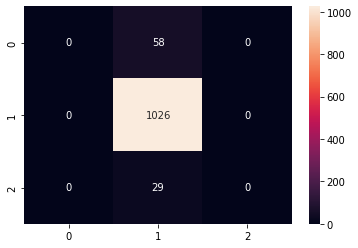

In [ ]:
# confusion_matrix before upsampled

logR_cm = confusion_matrix(y_test, logR_predict)

print(logR_cm)

sns.heatmap(logR_cm,annot=True, fmt='d')

[[ 24  34   0]
 [200 824   2]
 [  8  21   0]]


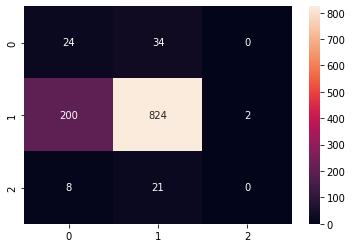

In [ ]:
# confusion_matrix after upsampled

logR_cm_resample = confusion_matrix(y_test, logR_upsampled_pred)

print(logR_cm_resample)

sns.heatmap(logR_cm_resample,annot=True, fmt='d')

[[ 21  16  21]
 [158 425 443]
 [  2   8  19]]


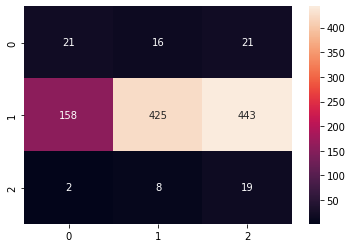

In [ ]:
# confusion_matrix SMOTE

logR_cm_smote = confusion_matrix(y_test, logR_smote_pred)

print(logR_cm_smote)

sns.heatmap(logR_cm_smote,annot=True, fmt='d')

From the Confusion Matrix, we get a clearer picture of how the Logistic Regression performed under Basic, Resampling and SMOTE method on this Imbalanced Dataset. Unfortunately the prediction outcomes aren't satisfying which in result of the evaluation scoring are not as great.

### <ins>Logistic Regression</ins>: Cross-validation
Next we run the dataset into Cross-validation using Logistic Regression to get more affirmative under the several folds to see how the prediction evaluation score.

In [ ]:
#Setting up the K numbers of Fold
kf_logR = KFold(n_splits=5, random_state=111, shuffle=True) # Define the split - into 5 folds 
kf_logR.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf_logR) 

KFold(n_splits=5, random_state=111, shuffle=True)


In [ ]:
# Perform 5-fold cross validation
logR_cv_scores = cross_val_score(logR, X_train_norm, y_train, cv=kf_logR)
print("Logistic Regression Cross validation scores:", logR_cv_scores, sep='\n')

Logistic Regression Cross validation scores:
[0.89210019 0.92100193 0.94026975 0.92870906 0.92857143]


In [ ]:
# Perform 5-fold cross validation with Resample set
logR_resample_cv_scores = cross_val_score(logR, X_resample_train_norm, y_resample_train, cv=kf_logR)
print("Logistic Regression Cross validation scores with Resample set:", logR_resample_cv_scores, sep='\n')

Logistic Regression Cross validation scores with Resample set:
[0.52142111 0.52978056 0.52664577 0.54127482 0.52405858]


In [ ]:
# Perform 5-fold cross validation with smote set
sm_logR_cv_scores = cross_val_score(logR_smote_clf, X_sm_train, y_sm_train, cv=kf_logR)
print("Logistic Regression Cross validation scores with SMOTE set:", sm_logR_cv_scores, sep='\n')

Logistic Regression Cross validation scores with SMOTE set:
[0.57729805 0.55679443 0.54006969 0.50592334 0.52473868]


On the basic setup of Logistic Regression, even though the scores are relatively high but keep in mind it was due to the influence from Majority Class - "Negative" class. 
<br>
<br>
Meanwhile, the Cross-validation under the Resampling and SMOTE set we can see the scores are both around 50%+ across all the 5 folds. These aren't terrible score but either they are strong/high score to justify that Logistic Regression is a good algorithm to use for this dataset.

### <ins>Logistic Regression</ins>: hyperparameters tuning with L2(Regularization) 
Next we perform Logistic Regression in hyperparameters tuning with Regularization

In [ ]:
#using L2 penalty as L1 is more suitable for binary whereas our dataset is multiclass
parameters_logR = [{'penalty':['l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

gridSearch_logR = GridSearchCV(estimator = logR,
                               param_grid = parameters_logR,
                               scoring = 'accuracy',
                               cv = 10,
                               n_jobs = -1)

gridSearch_logR.fit(X_train_norm, y_train)
best_accuracy_logR = gridSearch_logR.best_score_
best_parameter_logR = gridSearch_logR.best_params_  

# print("Best Accuracy of Logistic Regression: {:.2f} %".format(best_accuracy_logR.mean()*100))
# print("Best Parameter of Logistic Regression:", best_paramaeter_logR)

"""
Printing results
"""

print("Best: %f using %s" % (best_accuracy_logR, best_parameter_logR))
logR_means = gridSearch_logR.cv_results_['mean_test_score']
logR_stds = gridSearch_logR.cv_results_['std_test_score']
logR_params = gridSearch_logR.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean, stdev, param in zip(logR_means, logR_stds, logR_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.922129 using {'C': 0.001, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 0.001, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 0.01, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 0.1, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 1, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 10, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 100, 'penalty': 'l2'}
0.922129 (0.001454) with: {'C': 1000, 'penalty': 'l2'}


In [ ]:
#GridSearch CV with Logistic Regression of Resample set

gridSearch_logR_resample = GridSearchCV(estimator = logR_upsampled_clf,
                                       param_grid = parameters_logR,
                                       scoring = 'accuracy',
                                       cv = 10,                            
                                       n_jobs = -1)

gridSearch_logR_resample.fit(X_resample_train, y_resample_train)
best_accuracy_logR_resample = gridSearch_logR_resample.best_score_
best_parameter_logR_resample = gridSearch_logR_resample.best_params_  

# print("Best Accuracy of Logistic Regression with Resample set: {:.2f} %".format(best_accuracy_logR_resample.mean()*100))
# print("Best Parameter of Logistic Regression with Resample set:", best_paramaeter_logR_resample)

"""
Printing results
"""

print("Best: %f using %s" % (best_accuracy_logR_resample, best_parameter_logR_resample))
logR_means_resample = gridSearch_logR_resample.cv_results_['mean_test_score']
logR_stds_resample = gridSearch_logR_resample.cv_results_['std_test_score']
logR_params_resample = gridSearch_logR_resample.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean2, stdev2, param2 in zip(logR_means_resample, logR_stds_resample, logR_params_resample):
    print("%f (%f) with: %r" % (mean2, stdev2, param2))

Best: 0.534277 using {'C': 0.1, 'penalty': 'l2'}
0.500000 (0.000660) with: {'C': 0.001, 'penalty': 'l2'}
0.530517 (0.008602) with: {'C': 0.01, 'penalty': 'l2'}
0.534277 (0.015391) with: {'C': 0.1, 'penalty': 'l2'}
0.529051 (0.018858) with: {'C': 1, 'penalty': 'l2'}
0.532814 (0.018772) with: {'C': 10, 'penalty': 'l2'}
0.532396 (0.018423) with: {'C': 100, 'penalty': 'l2'}
0.533858 (0.017459) with: {'C': 1000, 'penalty': 'l2'}


In [ ]:
#GridSearch CV with Logistic Regression of SMOTE set

gridSearch_logR_smote = GridSearchCV(estimator = logR_smote_clf,
                                       param_grid = parameters_logR,
                                       scoring = 'accuracy',
                                       cv = 10,                            
                                       n_jobs = -1)

gridSearch_logR_smote.fit(X_sm_train, y_sm_train)
best_accuracy_logR_smote = gridSearch_logR_smote.best_score_
best_parameter_logR_smote = gridSearch_logR_smote.best_params_  

# print("Best Accuracy of Logistic Regression with SMOTE set: {:.2f} %".format(best_accuracy_logR_smote.mean()*100))
# print("Best Parameter of Logistic Regression with SMOTE set:", best_paramaeter_logR_smote)

"""
Printing results
"""

print("Best: %f using %s" % (best_accuracy_logR_smote, best_parameter_logR_smote))
logR_means_smote = gridSearch_logR_smote.cv_results_['mean_test_score']
logR_stds_smote = gridSearch_logR_smote.cv_results_['std_test_score']
logR_params_smote = gridSearch_logR_smote.cv_results_['params']


#prints the best result & the results from all combinations evaluated.
for mean3, stdev3, param3 in zip(logR_means_smote, logR_stds_smote, logR_params_smote):
    print("%f (%f) with: %r" % (mean3, stdev3, param3))

Best: 0.547522 using {'C': 1, 'penalty': 'l2'}
0.432972 (0.020114) with: {'C': 0.001, 'penalty': 'l2'}
0.524665 (0.020357) with: {'C': 0.01, 'penalty': 'l2'}
0.536371 (0.023277) with: {'C': 0.1, 'penalty': 'l2'}
0.547522 (0.017181) with: {'C': 1, 'penalty': 'l2'}
0.547243 (0.017989) with: {'C': 10, 'penalty': 'l2'}
0.546686 (0.017818) with: {'C': 100, 'penalty': 'l2'}
0.547243 (0.018164) with: {'C': 1000, 'penalty': 'l2'}


With Hyperparameters tuning the results aren't surpisingly different from KFolds in all 3 methods. Despite testing it with different C (Inverse of regularization strength) values, it still shows that Logistic Regression algorithm is not performing greatly for this dataset case.

### <ins>Logistic Regression</ins>: Feature importance
Despite Logsitc Regression may not be the best choice of algorithm for this dataset, let's check the outcome of it's Feature Importance under all 3 methods

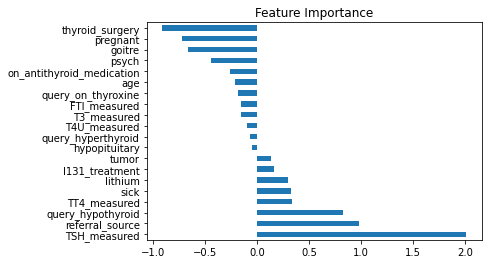

In [ ]:
logR_importance = logR_model.coef_[0]
#importance is a list so you can plot it. 
logR_feat_importances = pd.Series(logR_importance, index=X_train_norm.columns)


logR_feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

We can see in Basic Logistic Regression, TSH_measured and referral_source instances are the top 2 higher **positive** influence/importancy towards the prediction performance, then thyroid_surgery and pregnant instances are the top 2 higher **negative** influence/importancy towards the prediction performance.

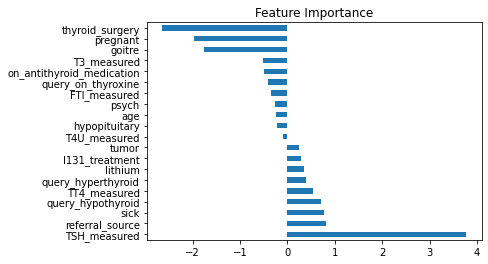

In [ ]:
logR_resample_importance = logR_upsampled_model.coef_[0]
#importance is a list so you can plot it. 
logR_resample_feat_importances = pd.Series(logR_resample_importance, index=X_resample_train_norm.columns)


logR_resample_feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In the Resampling set, the significant top 2 higher **Positive** & **Negative** influence/importancy of the feature Importance are the same as the Basic Logistic Regression model - which are TSH_measured, referral_source, thyroid_surgery and pregnant.

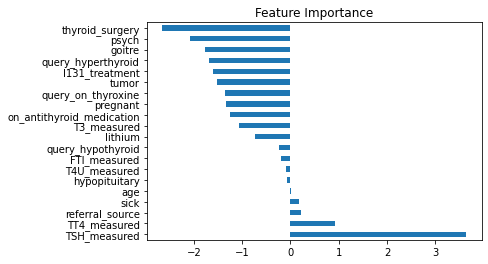

In [ ]:
logR_smote_importance = logR_smote_model.coef_[0]
#importance is a list so you can plot it. 
logR_smote_feat_importances = pd.Series(logR_smote_importance, index=X_sm_train.columns)


logR_smote_feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

However, under the SMOTE set the top 2 higher of **Positive** & **Negative** Feature Importance are slightly different. While both top 1 remained the same as TSH_measured(Positive influence/importancy) and Thyroid_surgery(Negative influence/importancy), **TT4_measured** is taken over referral_source as the 2nd top higher positive influence while **psych** taken over pregnant as the 2nd top higher negative influence.

---

## K-nearest neighbours

In [ ]:
#setting up the KNN classifier
knn = KNeighborsClassifier()

knn_model = knn.fit(X_train_norm, y_train)
knn_predict = knn.predict(X_test_norm)

In [ ]:
test_score_knn = knn.score(X_test_norm, y_test)
print("Accuracy Score for Test dataset in KNN = {:.2f}%".format(test_score_knn*100))

Accuracy Score for Test dataset in KNN = 91.37%


It appears that even KNN classifier is also facing the same issue as the Logistic above where the accuracy score as high as close to 92%.
<br>
<br>
Since Accuracy is only taking into account of True Positive and True Negative, we know this dataset is an imbalanced class/dataset, this could means the accuracy of the model prediction is leaning towards the "Negative Class" as the majority class.
<br>
<br>
Let's use other evaluation metrics to further assess the performance of K-Nearest Neighbours.

#### Micro & Macro avaraged evaluation metrics

Micro: Each <ins>instances</ins> has equal weights, so larger classes will have more influnce
<br>
Macro: Each <ins>class</ins> has equal weights
<br>
Weighted: In case of class imbalances (different number of instances related to different class labels).

In [ ]:
print("Micro-averaged Precision with KNN = {:.2f}% ".format(precision_score(y_test, knn_predict, average="micro")*100))
print("Macro-averaged Precision with KNN = {:.2f}% ".format(precision_score(y_test, knn_predict, average="macro")*100))
print("Weighted averaged Precision with KNN = {:.2f}% ".format(precision_score(y_test, knn_predict, average="weighted")*100))

Micro-averaged Precision with KNN = 91.37% 
Macro-averaged Precision with KNN = 40.78% 
Weighted averaged Precision with KNN = 86.69% 


In [ ]:
print("Micro-averaged Recall with KNN = {:.2f}% ".format(recall_score(y_test, knn_predict, average="micro")*100))
print("Macro-averaged Recall with KNN = {:.2f}% ".format(recall_score(y_test, logR_predict, average="macro")*100))
print("Weighted averaged Recall with KNN = {:.2f}% ".format(recall_score(y_test, logR_predict, average="weighted")*100))

Micro-averaged Recall with KNN = 91.37% 
Macro-averaged Recall with KNN = 33.33% 
Weighted averaged Recall with KNN = 92.18% 


In [ ]:
print("Micro-averaged F1 with KNN = {:.2f}% ".format(f1_score(y_test, knn_predict, average="micro")*100))
print("Macro-averaged F1 with KNN = {:.2f}% ".format(f1_score(y_test, knn_predict, average="macro")*100))
print("Weighted averaged F1 with KNN = {:.2f}% ".format(f1_score(y_test, knn_predict, average="weighted")*100))

Micro-averaged F1 with KNN = 91.37% 
Macro-averaged F1 with KNN = 34.77% 
Weighted averaged F1 with KNN = 88.48% 


In all these 3 quick evaluation metrics of Precision, Recall and F1-score using Micro, Macro and Weighted averaged, which those averaged with micro and weighted are relatively high score, those with **Macro** averaged are very low. It is quite similar on their performance using Logistic Regression.
<br>
<br>
With these preliminary evaluation, we may assumed that KNN may also not the good algorithm choice for this dataset. But let's try to use other methods to assess this dataset further to make a better conclusions. 

#### Resampling Techniques — Oversample minority class

Up next, let's use Resampling Technique to Oversample the minority class so we can see if this resampling the number of instances and help to improve the prediction assessment with **KNN**.

In [ ]:
#Resample not_Negative class

# concatenate our training data back together
knn_resample = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
knn_not_negative = knn_resample[knn_resample.Class!=1]
knn_negative = knn_resample[knn_resample.Class==1]

#Resample not_Negative class

# upsample minority
knn_minor_upsampled = resample(knn_not_negative,
                          replace=True, # sample with replacement
                          n_samples=len(knn_negative), # match number in majority class
                          random_state=20) # reproducible results

# combine majority and upsampled minority
knn_upsampled = pd.concat([knn_negative, knn_minor_upsampled])

# check new class counts
print("Logistic Regression Upsampled value counts:", knn_upsampled.Class.value_counts(), sep='\n')

print("\nUpsampled shape:", knn_upsampled.shape)
print('\n')


"""
Assemble the resampled dataset for Model assess
"""
X_knn_resample_train = knn_upsampled.drop('Class', axis=1)
y_knn_resample_train = knn_upsampled.Class


#Data normalization with MinMaxScaler
X_knn_resample_train_norm = pd.DataFrame(scaler.fit_transform(X_knn_resample_train), columns=X_knn_resample_train.columns)
X_knn_resample_test_norm = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


#Logistic Regression Classifier
knn_upsampled_clf = KNeighborsClassifier().fit(X_knn_resample_train_norm, y_knn_resample_train)

knn_upsampled_pred = knn_upsampled_clf.predict(X_knn_resample_test_norm)



"""
Evaluation portion
"""

print("\u0332".join("Resample Evaluation Metrics with K-nearest neighbor:"))
# Checking accuracy
print("Accuracy Score = {:.2f}% ".format(accuracy_score(y_test, knn_upsampled_pred)*100))
    
#precision score
print("Precision Score with Macro-averaged evaluation = {:.2f}% ".format(precision_score(y_test, knn_upsampled_pred, average="macro")*100)) 
    
# recall score    
print("Recall Score with Macro-averaged evaluation = {:.2f}% ".format(recall_score(y_test, knn_upsampled_pred, average="macro")*100))

# f1 score
print("F1 Score with Macro-averaged evaluation = {:.2f}% ".format(f1_score(y_test, knn_upsampled_pred, average="macro")*100))

Logistic Regression Upsampled value counts:
1    2392
0    1632
2     760
Name: Class, dtype: int64

Upsampled shape: (4784, 22)


R̲e̲s̲a̲m̲p̲l̲e̲ ̲E̲v̲a̲l̲u̲a̲t̲i̲o̲n̲ ̲M̲e̲t̲r̲i̲c̲s̲ ̲w̲i̲t̲h̲ ̲K̲-̲n̲e̲a̲r̲e̲s̲t̲ ̲n̲e̲i̲g̲h̲b̲o̲r̲:
Accuracy Score = 72.42% 
Precision Score with Macro-averaged evaluation = 37.36% 
Recall Score with Macro-averaged evaluation = 44.82% 
F1 Score with Macro-averaged evaluation = 37.08% 


While the Accuracy in this Resample set is about 72%+ which is somewhat decent, but all 3 evaluation metrics (Precision, Recall & F1 score) with Macro-averaged are contrarily low.

#### SMOTE (a.k.a Synthetic Minority Oversampling Technique)

Let's look at SMOTE method for dealing with imbalanced dataset using KNN classifier.

In [ ]:
knn_smote = KNeighborsClassifier().fit(X_sm_train, y_sm_train)

knn_smote_pred = knn_smote.predict(X_test)

"""
Evaluation portion
"""

print("\u0332".join("SMOTE Evaluation Metrics with K-nearest neighbor:"))
# Checking accuracy
print("Accuracy Score = {:.2f}% ".format(accuracy_score(y_test, knn_smote_pred)*100))
    
#precision score
print("Precision Score with Macro-averaged evaluation = {:.2f}% ".format(precision_score(y_test, knn_smote_pred, average="macro")*100)) 
    
# recall score    
print("Recall Score with Macro-averaged evaluation = {:.2f}% ".format(recall_score(y_test, knn_smote_pred, average="macro")*100))

# f1 score
print("F1 Score with Macro-averaged evaluation = {:.2f}% ".format(f1_score(y_test, knn_smote_pred, average="macro")*100))

S̲M̲O̲T̲E̲ ̲E̲v̲a̲l̲u̲a̲t̲i̲o̲n̲ ̲M̲e̲t̲r̲i̲c̲s̲ ̲w̲i̲t̲h̲ ̲K̲-̲n̲e̲a̲r̲e̲s̲t̲ ̲n̲e̲i̲g̲h̲b̲o̲r̲:
Accuracy Score = 55.62% 
Precision Score with Macro-averaged evaluation = 35.01% 
Recall Score with Macro-averaged evaluation = 38.81% 
F1 Score with Macro-averaged evaluation = 29.77% 


As compared to the Resample set with KNN, SMOTE method with KNN drop quite significantly low scorings. SMOTE method for dealing with imbalanced data may not be the great method to use with KNN in this dataset. Score are too low and even reduced further compare to the Basic KNN and/or with Resample method.

#### Classification Report

Here using Classification Report to inspect the evaluation scoring of each method and how well is the prediction of each class

In [ ]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.30      0.05      0.09        58
           1       0.92      0.99      0.95      1026
           2       0.00      0.00      0.00        29

    accuracy                           0.91      1113
   macro avg       0.41      0.35      0.35      1113
weighted avg       0.87      0.91      0.88      1113



In [ ]:
print(classification_report(y_test,knn_upsampled_pred))

              precision    recall  f1-score   support

           0       0.12      0.38      0.18        58
           1       0.94      0.76      0.84      1026
           2       0.06      0.21      0.09        29

    accuracy                           0.72      1113
   macro avg       0.37      0.45      0.37      1113
weighted avg       0.88      0.72      0.79      1113



In [ ]:
print(classification_report(y_test,knn_smote_pred))

              precision    recall  f1-score   support

           0       0.07      0.31      0.11        58
           1       0.95      0.58      0.72      1026
           2       0.04      0.28      0.06        29

    accuracy                           0.56      1113
   macro avg       0.35      0.39      0.30      1113
weighted avg       0.88      0.56      0.67      1113



#### Confusion Matrix for K-nearest neighbours

[[   3   55    0]
 [   7 1014    5]
 [   0   29    0]]


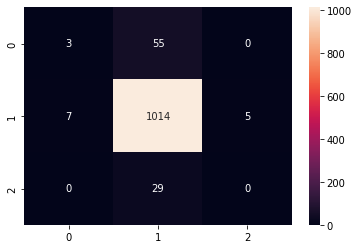

In [ ]:
# confusion_matrix before upsampled

knn_cm = confusion_matrix(y_test, knn_predict)

print(knn_cm)

sns.heatmap(knn_cm,annot=True, fmt='d')

[[ 22  32   4]
 [153 778  95]
 [  9  14   6]]


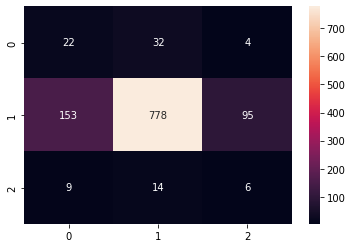

In [ ]:
# confusion_matrix after upsampled

knn_cm_resample = confusion_matrix(y_test, knn_upsampled_pred)

print(knn_cm_resample)

sns.heatmap(knn_cm_resample,annot=True, fmt='d')

[[ 18  26  14]
 [231 593 202]
 [ 13   8   8]]


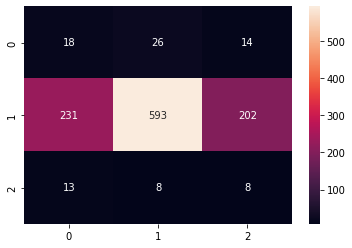

In [ ]:
# confusion_matrix after upsampled

knn_cm_smote = confusion_matrix(y_test, knn_smote_pred)

print(knn_cm_smote)

sns.heatmap(knn_cm_smote,annot=True, fmt='d')

From the **Classification report** and the **Confusion Matrix**, we get a clearer picture of how the KNN performed under Basic, Resampling and SMOTE method on this Imbalanced Dataset. As compared to Basic Logistic Regression, the basic KNN did attempt to predict more on other class instances but still lean towards more of the class 1 - Negative class. Same for the Resampling and SMOTE set.

### <ins>K-nearest neighbours</ins>: Cross-Validation
Next we run the dataset into Cross-validation using KNN to get more affirmative under the several folds to see how the prediction evaluation score.

In [ ]:
kf_knn = KFold(n_splits=5, random_state=135, shuffle=True) # Define the split - into 5 folds 
kf_knn.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf_knn) 

KFold(n_splits=5, random_state=135, shuffle=True)


In [ ]:
# Perform 5-fold cross validation
knn_cv_scores = cross_val_score(knn, X_train_norm, y_train, cv=kf_knn)
print("KNN Cross validation scores:", knn_cv_scores, sep='\n')

KNN Cross validation scores:
[0.91136802 0.91907514 0.91907514 0.93256262 0.91312741]


In [ ]:
# Perform 5-fold cross validation with resample set
knn_resample_cv_scores = cross_val_score(knn, X_knn_resample_train_norm, y_knn_resample_train, cv=kf_knn)
print("KNN Cross validation scores with Resample set:", knn_resample_cv_scores, sep='\n')

KNN Cross validation scores with Resample set:
[0.73458725 0.79101358 0.74399164 0.74712644 0.76778243]


In [ ]:
# Perform 5-fold cross validation with smote set
sm_knn_cv_scores = cross_val_score(knn_smote, X_sm_train, y_sm_train, cv=kf_knn)
print("KNN Cross validation scores with SMOTE set:", sm_knn_cv_scores, sep='\n')

KNN Cross validation scores with SMOTE set:
[0.67339833 0.71289199 0.70662021 0.6989547  0.69337979]


After KFolds of KNN under Basic, Resampling and SMOTE method the score does slightly improve especially the Resampling and SMOTE sets but I would not conclude that as significant improvement as the scoring and other metrics that have been used to evaluation this dataset with KNN is not confident enough that KNN is a good choice of algorithm for this dataset prediction

### <ins>K-nearest neighbours</ins>: Hyperparameters tuning

In [ ]:
#using all metric to show us which will be the best metric instead
n_neighbors = range(1, 11, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)



gridSearch_knn = GridSearchCV(estimator=knn, 
                          param_grid=grid, 
                          n_jobs=-1, 
                          cv=5, 
                          scoring='accuracy')

gridSearch_result = gridSearch_knn.fit(X_train_norm, y_train)


"""
Summurize results
"""
print("Best: %f using %s" % (gridSearch_result.best_score_, gridSearch_result.best_params_))
knn_means = gridSearch_result.cv_results_['mean_test_score']
knn_stds = gridSearch_result.cv_results_['std_test_score']
knn_params = gridSearch_result.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean4, stds4, param4 in zip(knn_means, knn_stds, knn_params):
    print("%f (%f) with: %r" % (mean4, stds4, param4))


Best: 0.921742 using {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.861611 (0.030128) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.861611 (0.030128) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.898994 (0.008275) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.886274 (0.004777) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.916344 (0.003994) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.903238 (0.007744) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.919815 (0.000971) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.905553 (0.008427) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.921742 (0.000970) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.906323 (0.008125) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.861610 (

In [ ]:
#GridSearch CV on KNN with resample set
gridSearch_knn_resample = GridSearchCV(estimator=knn, 
                                      param_grid=grid, 
                                      n_jobs=-1, 
                                      cv=5, 
                                      scoring='accuracy')

gridSearch_knn_resample_result = gridSearch_knn_resample.fit(X_knn_resample_train_norm, y_knn_resample_train)


"""
Summurize results
"""
print("Best: %f using %s" % (gridSearch_knn_resample_result.best_score_, gridSearch_knn_resample_result.best_params_))
knn_means_resample = gridSearch_knn_resample_result.cv_results_['mean_test_score']
knn_stds_resample = gridSearch_knn_resample_result.cv_results_['std_test_score']
knn_params_resample = gridSearch_knn_resample_result.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean5, stds5, param5 in zip(knn_means_resample, knn_stds_resample, knn_params_resample):
    print("%f (%f) with: %r" % (mean5, stds5, param5))


Best: 0.781148 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.653013 (0.010894) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.653013 (0.010894) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.681858 (0.005235) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.686248 (0.005463) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.757319 (0.009023) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.776549 (0.007778) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.747704 (0.009270) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.776968 (0.011534) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.737045 (0.012494) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.773414 (0.009450) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.652386 

In [ ]:
#GridSearch CV on KNN with resample set
gridSearch_knn_smote = GridSearchCV(estimator=knn, 
                                      param_grid=grid, 
                                      n_jobs=-1, 
                                      cv=5, 
                                      scoring='accuracy')

gridSearch_knn_smote_result = gridSearch_knn_resample.fit(X_sm_train, y_sm_train)

"""
Summurize results
"""
print("Best: %f using %s" % (gridSearch_knn_smote_result.best_score_, gridSearch_knn_smote_result.best_params_))
knn_means_smote = gridSearch_knn_smote_result.cv_results_['mean_test_score']
knn_stds_smote = gridSearch_knn_smote_result.cv_results_['std_test_score']
knn_params_smote = gridSearch_knn_smote_result.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean6, stds6, param6 in zip(knn_means_smote, knn_stds_smote, knn_params_smote):
    print("%f (%f) with: %r" % (mean6, stds6, param6))


Best: 0.724081 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.523279 (0.026871) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.523279 (0.026871) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.520627 (0.012365) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.522160 (0.010156) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.682691 (0.014654) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.694816 (0.014446) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.690356 (0.013893) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.706383 (0.011186) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.686594 (0.008465) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.709448 (0.007605) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.523279 

Given the feature of KNN(finding the nearest neighbour data point in the dimension), there isn't any Feature Importance available under this algorithms. So Hyperparameters tuning is one of the way to help identify they best metric, number of the neighbor circles(n_neighbors) and the weights to use in KNN prediction for this dataset.
<br>
<br>
All 3 of the above different methods - Basic, Resampling and SMOTE methods have shows their best choice of metric, n_neighors and weights. These are still not strong enough to assure that KNN is a good algorithm to use for prediction of this dataset study case.

## Conclusion

With all the commonly used methods that use to deal with imbalanced dataset, despite using them to evaluate Logistic Regression and K-Nearest Neighbor if these 2 algorithms are good choice for this case study.
<br>
<br>
Unfortunately as the evaluation scoring from all aspects are not strong enough, I believed we can make the conclusion that **Logistic Regression** & **K-Nearest Neighbors** are not the best choice of algorithm for this dataset case study.